<a href="https://colab.research.google.com/github/fcolome14/NPLDataTmp/blob/main/NLP_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

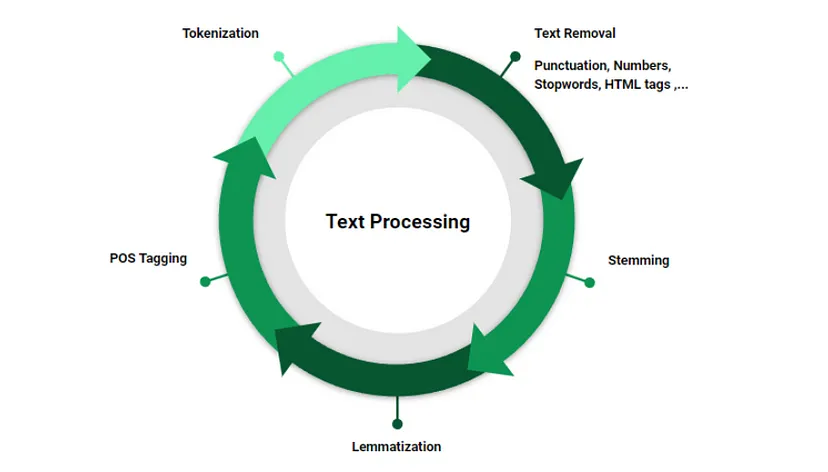

# Dataset Preparation for NLP usage

Author: Ferran Colomé

The steps to be followed can be proposed:

1. Loading the dataset
2. Preprocessing of data
3. Lemmatizing
Tokenizing
4. Cleaning
5. Stopword
6. Punctuations
7. Common words
8. URLs
9. HTML tags
10. Emojis
11. Expanding abbreviations


In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Load the Dataset

In [78]:
df = pd.read_csv('IMDB Dataset.csv', on_bad_lines='skip')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

## Data columns
Information about the dataset content:
- The "review" column contains the textual information(input features) and the "sentiment" column contains the output labels.

### Validating the number of entries
This includes the number of entries we have in the dataset.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197690 entries, 0 to 197689
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review     197690 non-null  object
 1   sentiment  197690 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


### Importing libraries

In [59]:
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (197690, 2)


## Statystical Analysis I

This is the start of the analysis phase where we will first check the amount of data present in either of the sentiments. We will follow this up with some pictorial representations related to the words and frequency mappings.

In [79]:
#Check the output value

good_reviews=df[df['sentiment']=='positive']['review']
bad_reviews=df[df['sentiment']=='negative']['review']

print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

Total Counts of both sets sentiment
positive    98880
negative    98810
Name: count, dtype: int64


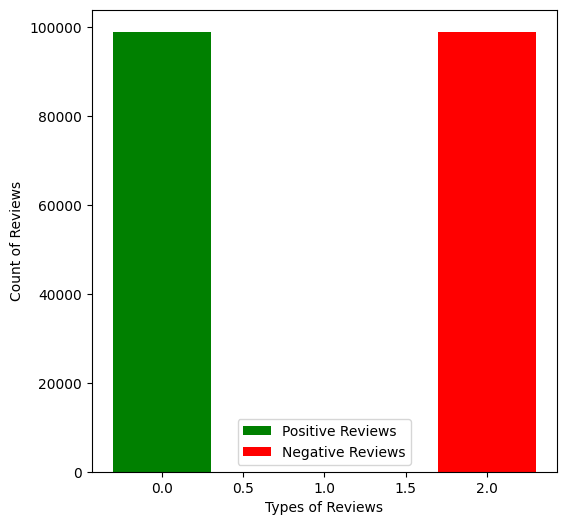

In [62]:
#Count of the different types of values for the output
count=df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()

count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

#### Count words

<ipython-input-63-71247db06839>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-71247db06839>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




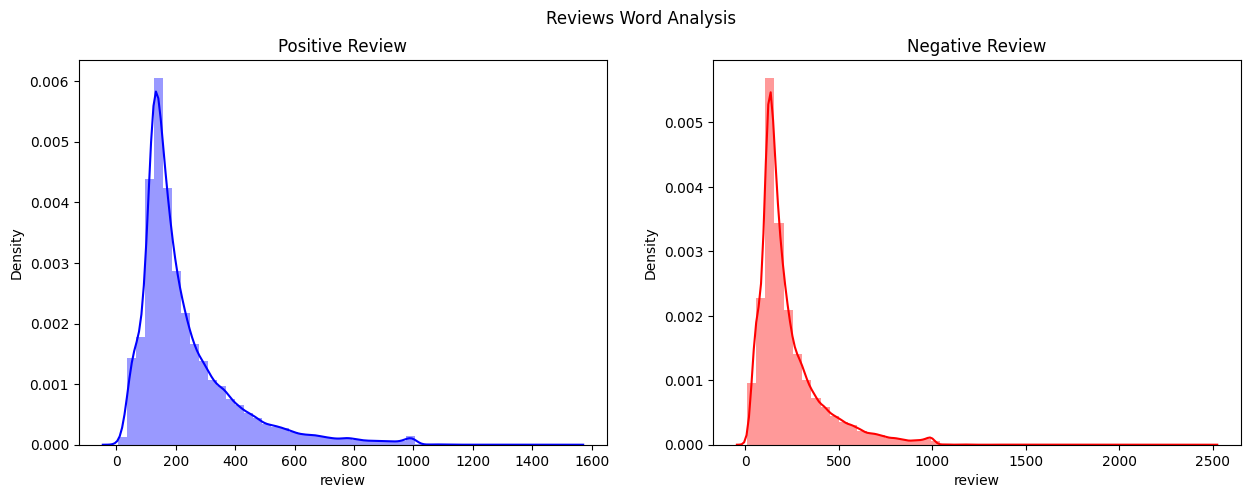

In [63]:
#Analyse the count of words in each segment
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()

count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))

# print("Positive Review Words:" + str(count_good_words))
# print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

#### Count other semantic data types

<ipython-input-63-71247db06839>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-71247db06839>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




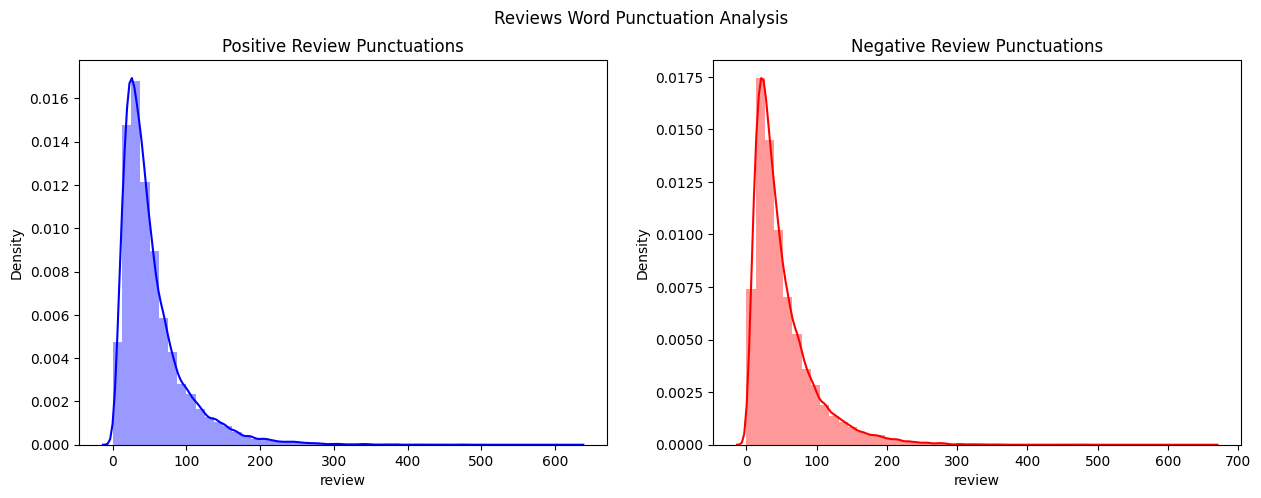

In [64]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_good_punctuations=count_good['review'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['review'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive Review Punctuations","Negative Review Punctuations","Reviews Word Punctuation Analysis")

#### Analyse stopwords

<ipython-input-65-41d29c0532ff>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-65-41d29c0532ff>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




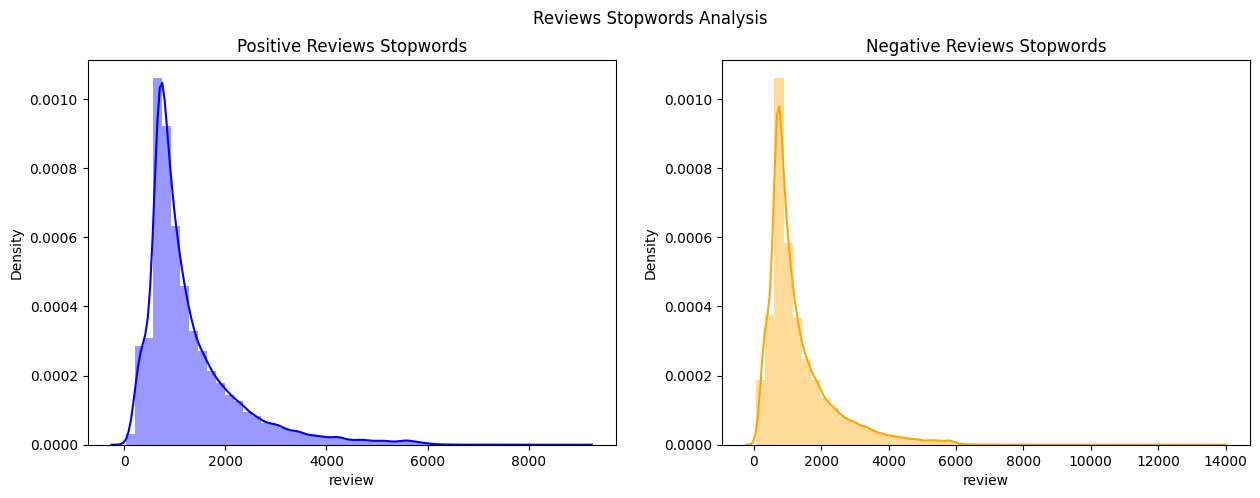

In [65]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()


stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

#### Check number of URLs

<ipython-input-65-41d29c0532ff>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-65-41d29c0532ff>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




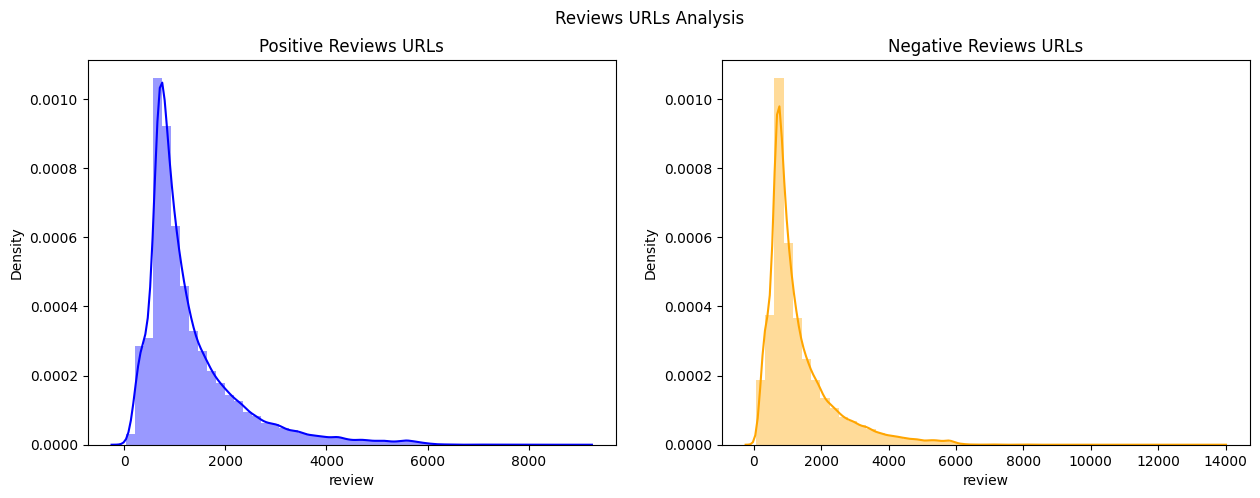

In [66]:
## Checking number of Urls
count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

#### Most frequent word visualization

<Axes: >

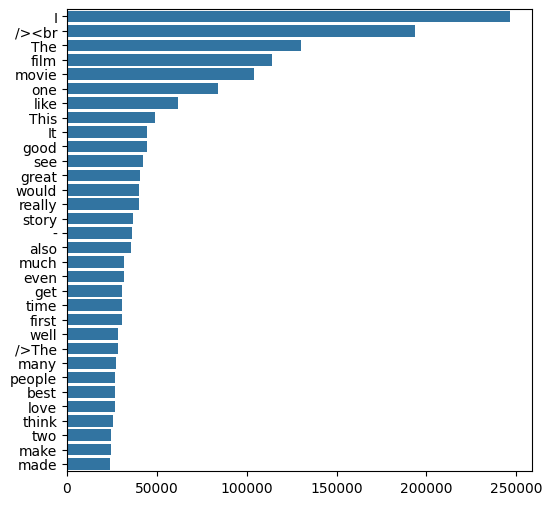

In [67]:
def create_corpus(word):
    corpus=[]

    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

### Inference From Analysis I
The following can be inferred from the data:

- The dataset is balanced.
- The dataset contains equal number of semantics for reviews of both polarity.
- The dataset contains redundant words and html syntaxes.
- Punctuations/stopwords are present in a equal distribution in the dataset.

## Statystical Analysis II

In this context, we will be exploring further into the analysis part. This would allow us to have a better idea which part of the data requires removal and which part can be transformed before applying any model on it.

#### Gram Analysis
Source: https://ayeung.dev/2018/06/03/generating-ngrams.html

Bi-gram analysis
   n_gram_words  n_gram_frequency
0   /><br />the                59
1     <br /><br                55
2     /><br />i                38
3  /><br />this                20
4    /><br />in                15


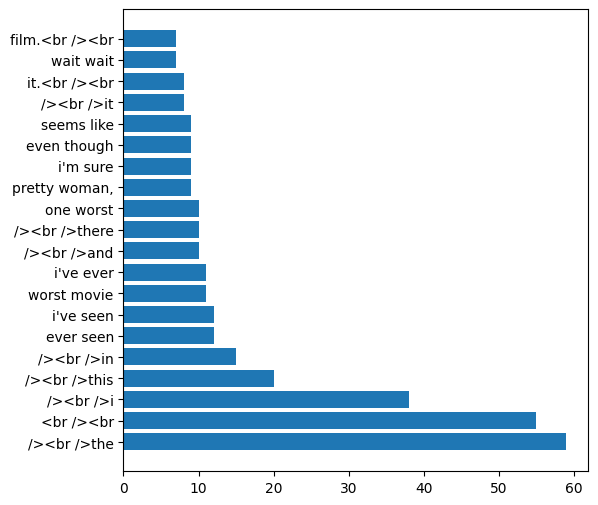

   n_gram_words  n_gram_frequency
0   /><br />the                74
1     <br /><br                41
2     /><br />i                29
3  /><br />this                24
4    />the film                14


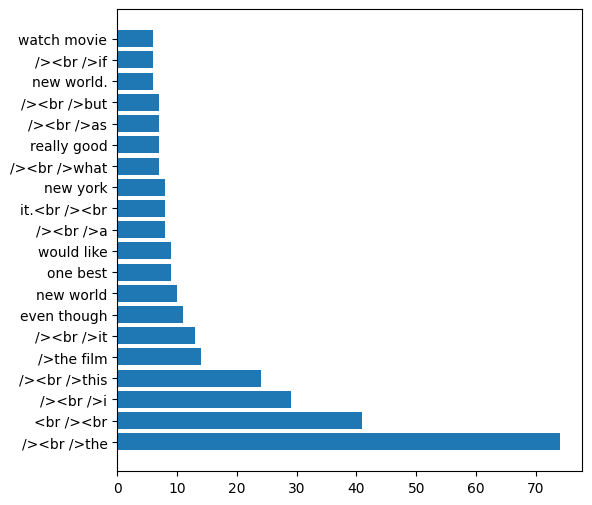

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis
         n_gram_words  n_gram_frequency
0  /><br />this movie                 7
1      wait wait wait                 6
2     <br /><br />the                 6
3      i've ever seen                 5
4    worst movie ever                 5


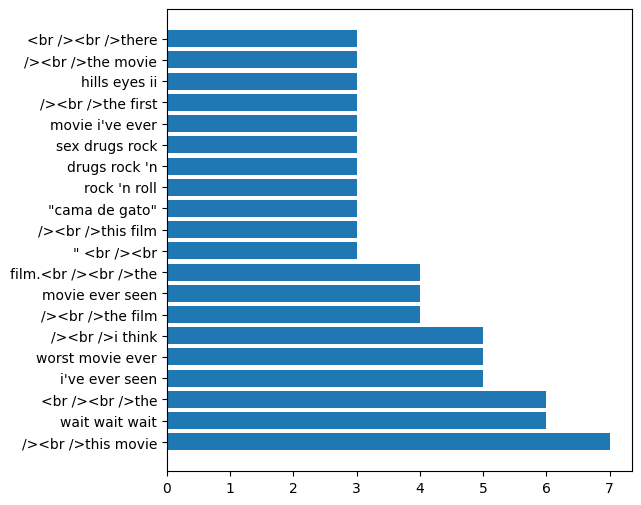

         n_gram_words  n_gram_frequency
0    /><br />the film                14
1     <br /><br />the                10
2  /><br />this movie                 5
3   /><br />the story                 5
4  /><br />the acting                 5


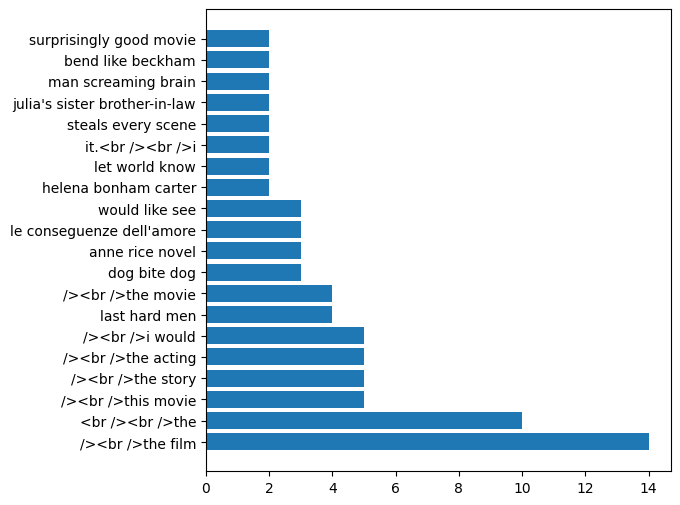

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [68]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    print(freq_df.head())
    plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace

def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews",
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

train_df_zero=count_bad['review']
train_df_ones=count_good['review']

print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Penta-gram analysis
defaultdict(<class 'int'>, {"basically there's family little boy": 1, "there's family little boy (jake)": 1, 'family little boy (jake) thinks': 1, "little boy (jake) thinks there's": 1, "boy (jake) thinks there's zombie": 1, "(jake) thinks there's zombie closet": 1, "thinks there's zombie closet &": 1, "there's zombie closet & parents": 1, 'zombie closet & parents fighting': 1, 'closet & parents fighting time.<br': 1, '& parents fighting time.<br /><br': 1, 'parents fighting time.<br /><br />this': 1, 'fighting time.<br /><br />this movie': 1, 'time.<br /><br />this movie slower': 1, '/><br />this movie slower soap': 1, '/>this movie slower soap opera...': 1, 'movie slower soap opera... suddenly,': 1, 'slower soap opera... suddenly, jake': 1, 'soap opera... suddenly, jake decides': 1, 'opera... suddenly, jake decides become': 1, 'suddenly, jake decides become rambo': 1, 'jake decides become rambo kill': 1, 'decides become rambo kill zombie.<br': 1, 'become rambo kil

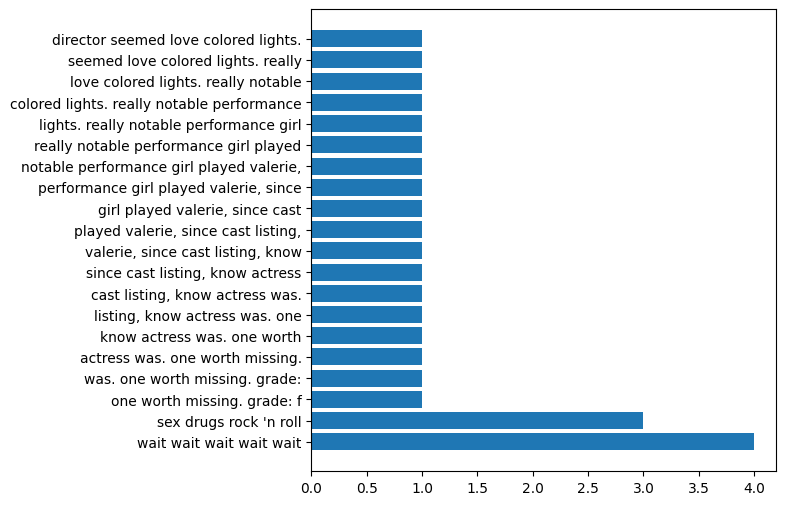

defaultdict(<class 'int'>, {"basically there's family little boy": 1, "there's family little boy (jake)": 1, 'family little boy (jake) thinks': 1, "little boy (jake) thinks there's": 1, "boy (jake) thinks there's zombie": 1, "(jake) thinks there's zombie closet": 1, "thinks there's zombie closet &": 1, "there's zombie closet & parents": 1, 'zombie closet & parents fighting': 1, 'closet & parents fighting time.<br': 1, '& parents fighting time.<br /><br': 1, 'parents fighting time.<br /><br />this': 1, 'fighting time.<br /><br />this movie': 1, 'time.<br /><br />this movie slower': 1, '/><br />this movie slower soap': 1, '/>this movie slower soap opera...': 1, 'movie slower soap opera... suddenly,': 1, 'slower soap opera... suddenly, jake': 1, 'soap opera... suddenly, jake decides': 1, 'opera... suddenly, jake decides become': 1, 'suddenly, jake decides become rambo': 1, 'jake decides become rambo kill': 1, 'decides become rambo kill zombie.<br': 1, 'become rambo kill zombie.<br /><br':

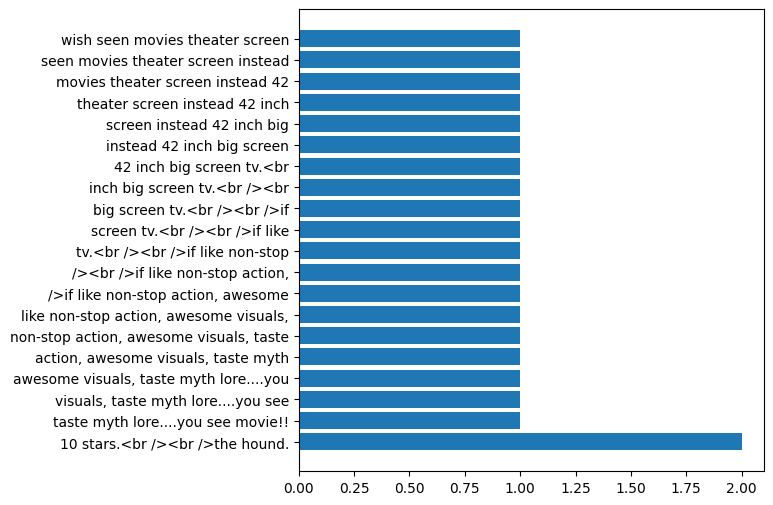

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [69]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

### Inference from Analysis II

In this section, we have analysed based on positional features of words in a corpus/sentence/paragraph. The Gram analysis, particularly the pentagram analysis provides an idea which sentences occur more often in the corpus. And in most of the cases, these bag of words are the ones picked up by any frequency vectorization technique.

Thus this provides an outline as to the frequency of the conjuction of words which are occuring at the highest frequency. Another important aspect is that, there is a presence of certain html tags and punctuations which have to be removed as these are adding noise to the review corpus. This will be taken up in the cleaning phase.

## Data Cleaning

Before we move ahead , let us clean the dataset and remove the redundancies.This includes

1. HTML codes
2. URLs
3. Emojis
4. Stopwords
5. Punctuations
6. Expanding Abbreviations

#### Removal of URLs, HTMLs, stopwords, punctuations

- HTML tags which contain: '<[text]>' tags
- URLs, which may content 'https://[text]' or 'www.[text]' structures
- Punctuations such as:  '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
%%time
import re

#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

df['review']=df['review'].apply(lambda z: remove_punctuations(z))
df['review']=df['review'].apply(lambda z: remove_html(z))
df['review']=df['review'].apply(lambda z: remove_url(z))
df['review']=df['review'].apply(lambda z: remove_emoji(z))

CPU times: user 25.8 s, sys: 265 ms, total: 26.1 s
Wall time: 28.9 s


In [83]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production br br The filmin...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically theres a family where a little boy J...  negative
4  Petter Matteis Love in the Time of Money is a ...  positive

### Handling chat words

Also known as internet slang or informal langauge

In [91]:
# Some ChatWords from a Github Repository source
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [92]:
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

df['review']=df['review'].apply(lambda z: chat_conversion(z))

In [93]:
df.head()

review sentiment
0  One of the other reviewer ha mentioned that af...  positive
1  A wonderful little production br br The filmin...  positive
2  I thought this wa a wonderful way to spend Tea...  positive
3  Basically there a family where a little boy Ja...  negative
4  Petter Matteis Love in the Tears in my eyes of...  positive

#### Removal of expanding abbreviations

In [72]:
# ## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
# def remove_abb(data):
#     data = re.sub(r"hea's", "he is", data)
#     data = re.sub(r"there's", "there is", data)
#     data = re.sub(r"We're", "We are", data)
#     data = re.sub(r"That's", "That is", data)
#     data = re.sub(r"won't", "will not", data)
#     data = re.sub(r"they're", "they are", data)
#     data = re.sub(r"Can't", "Cannot", data)
#     data = re.sub(r"wasn't", "was not", data)
#     data = re.sub(r"don\x89Ûªt", "do not", data)
#     data= re.sub(r"aren't", "are not", data)
#     data = re.sub(r"isn't", "is not", data)
#     data = re.sub(r"What's", "What is", data)
#     data = re.sub(r"haven't", "have not", data)
#     data = re.sub(r"hasn't", "has not", data)
#     data = re.sub(r"There's", "There is", data)
#     data = re.sub(r"He's", "He is", data)
#     data = re.sub(r"It's", "It is", data)
#     data = re.sub(r"You're", "You are", data)
#     data = re.sub(r"I'M", "I am", data)
#     data = re.sub(r"shouldn't", "should not", data)
#     data = re.sub(r"wouldn't", "would not", data)
#     data = re.sub(r"i'm", "I am", data)
#     data = re.sub(r"I\x89Ûªm", "I am", data)
#     data = re.sub(r"I'm", "I am", data)
#     data = re.sub(r"Isn't", "is not", data)
#     data = re.sub(r"Here's", "Here is", data)
#     data = re.sub(r"you've", "you have", data)
#     data = re.sub(r"you\x89Ûªve", "you have", data)
#     data = re.sub(r"we're", "we are", data)
#     data = re.sub(r"what's", "what is", data)
#     data = re.sub(r"couldn't", "could not", data)
#     data = re.sub(r"we've", "we have", data)
#     data = re.sub(r"it\x89Ûªs", "it is", data)
#     data = re.sub(r"doesn\x89Ûªt", "does not", data)
#     data = re.sub(r"It\x89Ûªs", "It is", data)
#     data = re.sub(r"Here\x89Ûªs", "Here is", data)
#     data = re.sub(r"who's", "who is", data)
#     data = re.sub(r"I\x89Ûªve", "I have", data)
#     data = re.sub(r"y'all", "you all", data)
#     data = re.sub(r"can\x89Ûªt", "cannot", data)
#     data = re.sub(r"would've", "would have", data)
#     data = re.sub(r"it'll", "it will", data)
#     data = re.sub(r"we'll", "we will", data)
#     data = re.sub(r"wouldn\x89Ûªt", "would not", data)
#     data = re.sub(r"We've", "We have", data)
#     data = re.sub(r"he'll", "he will", data)
#     data = re.sub(r"Y'all", "You all", data)
#     data = re.sub(r"Weren't", "Were not", data)
#     data = re.sub(r"Didn't", "Did not", data)
#     data = re.sub(r"they'll", "they will", data)
#     data = re.sub(r"they'd", "they would", data)
#     data = re.sub(r"DON'T", "DO NOT", data)
#     data = re.sub(r"That\x89Ûªs", "That is", data)
#     data = re.sub(r"they've", "they have", data)
#     data = re.sub(r"i'd", "I would", data)
#     data = re.sub(r"should've", "should have", data)
#     data = re.sub(r"You\x89Ûªre", "You are", data)
#     data = re.sub(r"where's", "where is", data)
#     data = re.sub(r"Don\x89Ûªt", "Do not", data)
#     data = re.sub(r"we'd", "we would", data)
#     data = re.sub(r"i'll", "I will", data)
#     data = re.sub(r"weren't", "were not", data)
#     data = re.sub(r"They're", "They are", data)
#     data = re.sub(r"Can\x89Ûªt", "Cannot", data)
#     data = re.sub(r"you\x89Ûªll", "you will", data)
#     data = re.sub(r"I\x89Ûªd", "I would", data)
#     data = re.sub(r"let's", "let us", data)
#     data = re.sub(r"it's", "it is", data)
#     data = re.sub(r"can't", "cannot", data)
#     data = re.sub(r"don't", "do not", data)
#     data = re.sub(r"you're", "you are", data)
#     data = re.sub(r"i've", "I have", data)
#     data = re.sub(r"that's", "that is", data)
#     data = re.sub(r"i'll", "I will", data)
#     data = re.sub(r"doesn't", "does not",data)
#     data = re.sub(r"i'd", "I would", data)
#     data = re.sub(r"didn't", "did not", data)
#     data = re.sub(r"ain't", "am not", data)
#     data = re.sub(r"you'll", "you will", data)
#     data = re.sub(r"I've", "I have", data)
#     data = re.sub(r"Don't", "do not", data)
#     data = re.sub(r"I'll", "I will", data)
#     data = re.sub(r"I'd", "I would", data)
#     data = re.sub(r"Let's", "Let us", data)
#     data = re.sub(r"you'd", "You would", data)
#     data = re.sub(r"It's", "It is", data)
#     data = re.sub(r"Ain't", "am not", data)
#     data = re.sub(r"Haven't", "Have not", data)
#     data = re.sub(r"Could've", "Could have", data)
#     data = re.sub(r"youve", "you have", data)
#     data = re.sub(r"donå«t", "do not", data)

# df['review']=df['review'].apply(lambda z: remove_abb(z))

### Data already cleaned. Gram statistics to visualize the results

In [84]:
count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']

Tri-gram analysis
       n_gram_words  n_gram_frequency
0     ive ever seen                 8
1  worst movie ever                 7
2    wait wait wait                 6
3       rock n roll                 5
4   movie ever seen                 5


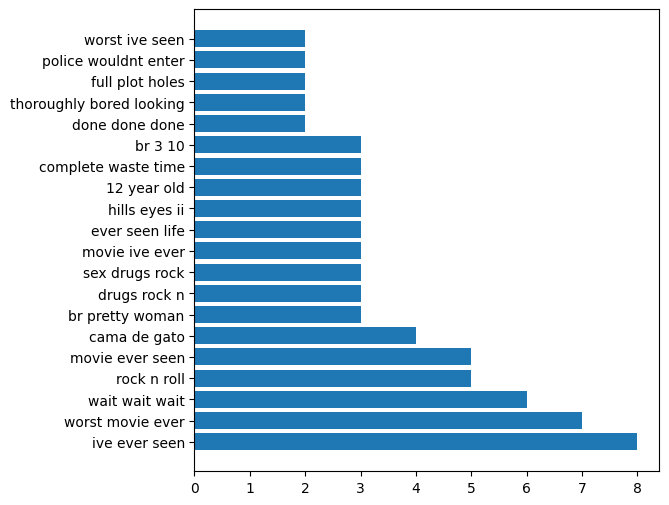

               n_gram_words  n_gram_frequency
0         throw momma train                 5
1             last hard men                 4
2  le conseguenze dellamore                 4
3              dog bite dog                 3
4           anne rice novel                 3


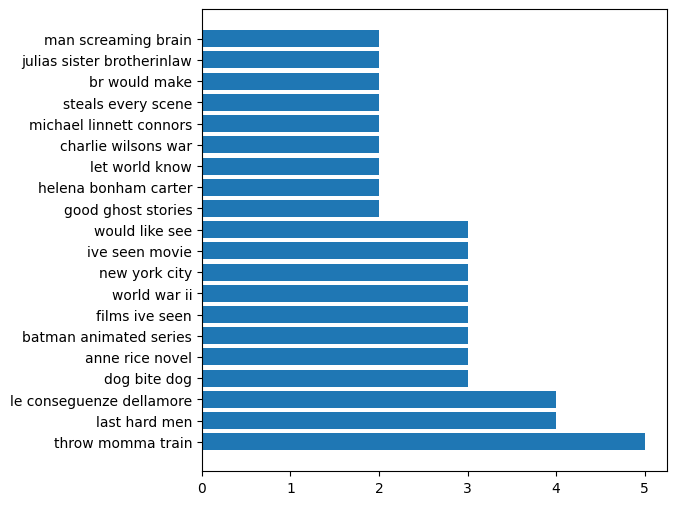

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [85]:
#Apply Gram Analysis
train_df_zero=count_bad['review']
train_df_ones=count_good['review']
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

## Corpus transforming

Now at this stage the data is successfully cleaned and all redundant noises are removed. These steps are generic to any NLP pipeline which reduces the dimension of the data

In [89]:
#Lemmatize the dataset
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def lemma_traincorpus(text):
    return " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

df['review'] = df['review'].apply(lemma_traincorpus)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [99]:
from nltk.stem import *
def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

sample_train_df=df[5:10]
sample_train_df['review']=sample_train_df['review'].apply(lambda z: stem_traincorpus(z))
sample_train_df['review']

<ipython-input-99-70e01d37f5a1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show wa an amazing fresh innovative idea ...
8    encouraged by the positive comment about this ...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

#### End of Dataset Preparation
At this stage , we have covered the dataset preparation part of the pipeline. At this stage we have analysed the dataset , got an initial estimate about the words in the corpus. We performed cleaning, statistical analysis as well as lemmatization to prepare the dataset for EDA and successive steps.

#### Vectorization and Embeddings
In this context, we will be vectorizing our dataset. This would allow us to convert our data to higher dimensional containers (matrices). These vectorization strategies allow the word corpus to be properly suitable for advanced semantic analysis. Vectorization is the process of converting text into numerical format so that models can process it.

Most common vectorization techniques are: Bags of Words, Term Frequency-Inverse Document Frequency (TFIDF) or One-Hot encoding.

These methods leverage statistical co-occurence probabilities and log likelihoods for determining the frequently occuring sentences or group of words in a corpus.

#### Vectorization - TFIDF and Count
We will move ahead with TFIDF and Count vectorization strategies and will be going in further sections.

- [TF-IDF Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): This works by applying a logarithmic term to inverse document frequency (IDF) part other than determining the "TF" or term freqency part. The formulation can be shown as follows:

- [Count Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): This is a simpler vectorization technique which relies on frequency of occurence of a particular term in a document or corpus.

Embedding is a technique used to represent words, sentences, or even entire documents as dense numerical vectors in a continuous space. These vectors capture semantic relationships, meaning, and context, making them useful for machine learning models.

Instead of treating words as independent tokens (like in one-hot encoding or CountVectorization), embeddings learn contextual relationships between words. This allows models to understand word similarity, analogies, and meanings more effectively.

In [100]:
%%time
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(df['review'].values.tolist())
train_tfidf.shape

CPU times: user 3min 24s, sys: 7.78 s, total: 3min 32s
Wall time: 4min 26s


(197690, 8071036)

#### Converting the labels to Binary Numerics

Here we convert the labels into binary (1,0) values , which will be helpful when we apply tensor compression or dimensionality reduction algorithms for visualizing the vectors.

In [104]:
%%time
train_li=[]
for i in range(len(df)):
    if (df['sentiment'][i]=='positive'):
        train_li.append(1)
    else:
        train_li.append(0)
df['Binary']=train_li
df.head()

CPU times: user 1.29 s, sys: 7.66 ms, total: 1.3 s
Wall time: 1.3 s


review sentiment  Binary
0  One of the other reviewer ha mentioned that af...  positive       1
1  A wonderful little production br br The filmin...  positive       1
2  I thought this wa a wonderful way to spend Tea...  positive       1
3  Basically there a family where a little boy Ja...  negative       0
4  Petter Matteis Love in the Tears in my eyes of...  positive       1

In [103]:
print(df['sentiment'].unique(), df['Binary'].unique())

['positive' 'negative'] [1 0]


#### Visualizing the vector space

As words and sentences are vectorized, the dimensions of the vector space becomes significantly large to be accomodated in a model. For any computation system it is recommended to keep the dimensions of a tensor (matrix) as small as possible and maintain its regularity.

Now, we have to reduce the dimensions, else the kernel will run out of memory. For this we employ 3 different decomposition techniques: PCA, SVD or TSNE.

                                              review sentiment  Binary
0  One of the other reviewer ha mentioned that af...  positive       1
1  A wonderful little production br br The filmin...  positive       1
2  I thought this wa a wonderful way to spend Tea...  positive       1
3  Basically there a family where a little boy Ja...  negative       0
4  Petter Matteis Love in the Tears in my eyes of...  positive       1


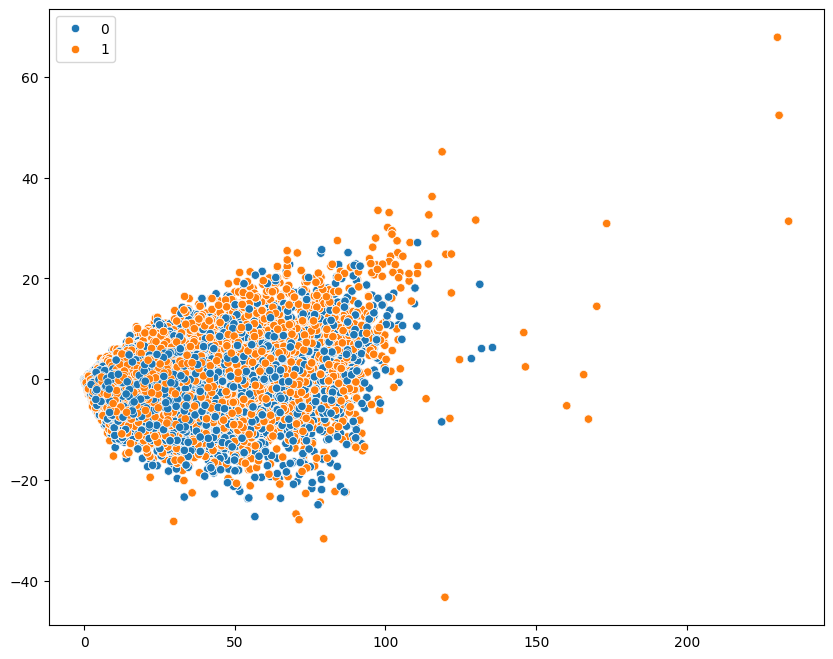

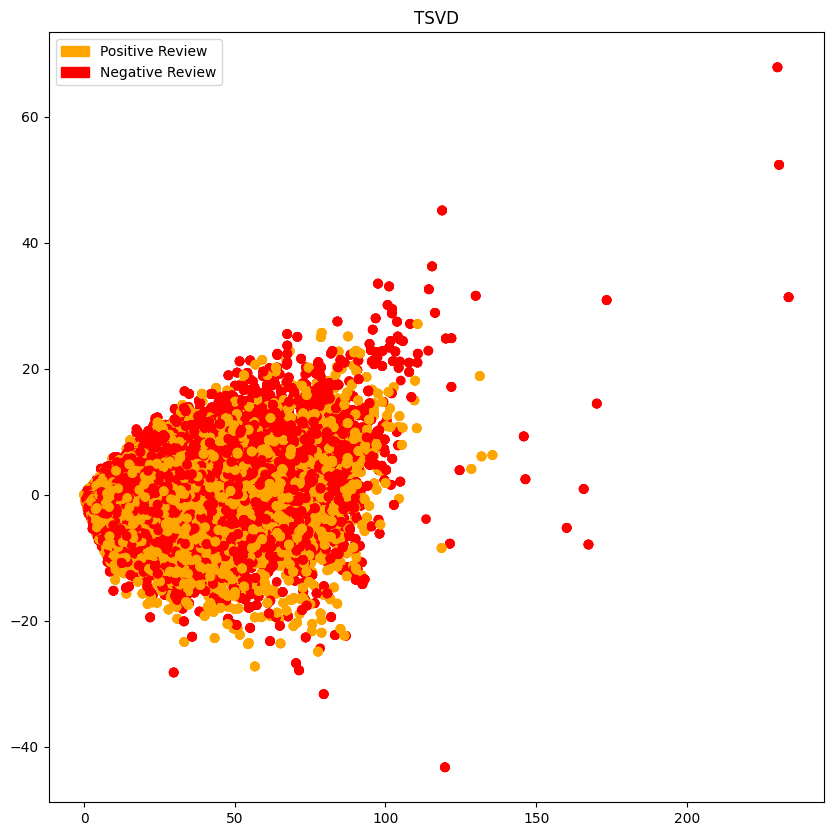

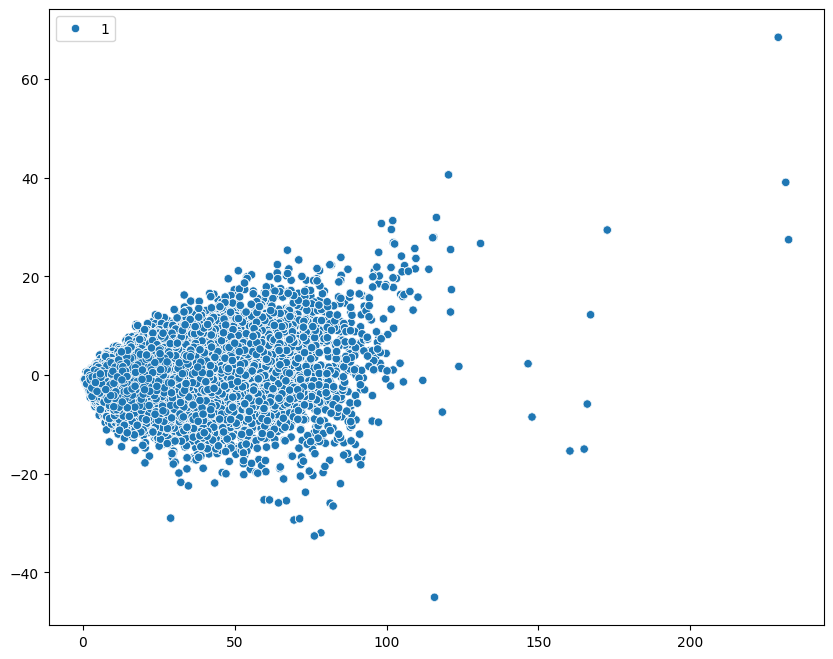

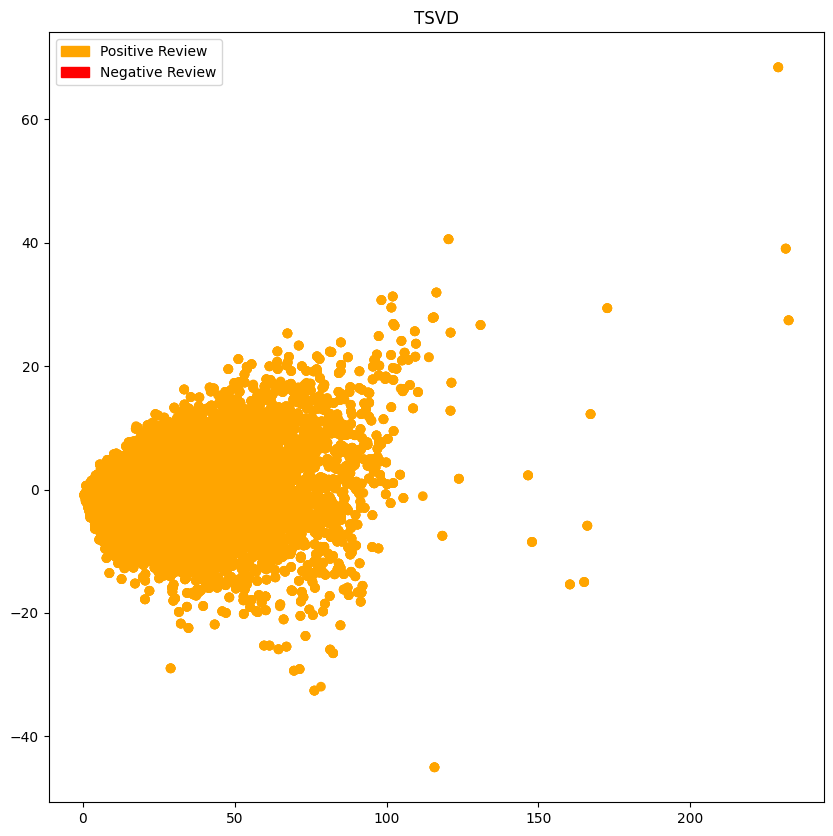

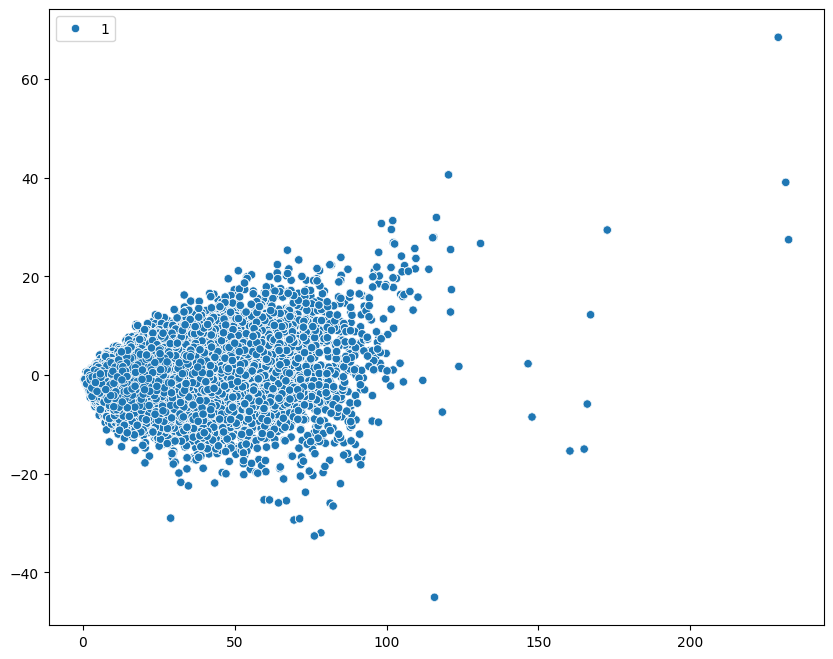

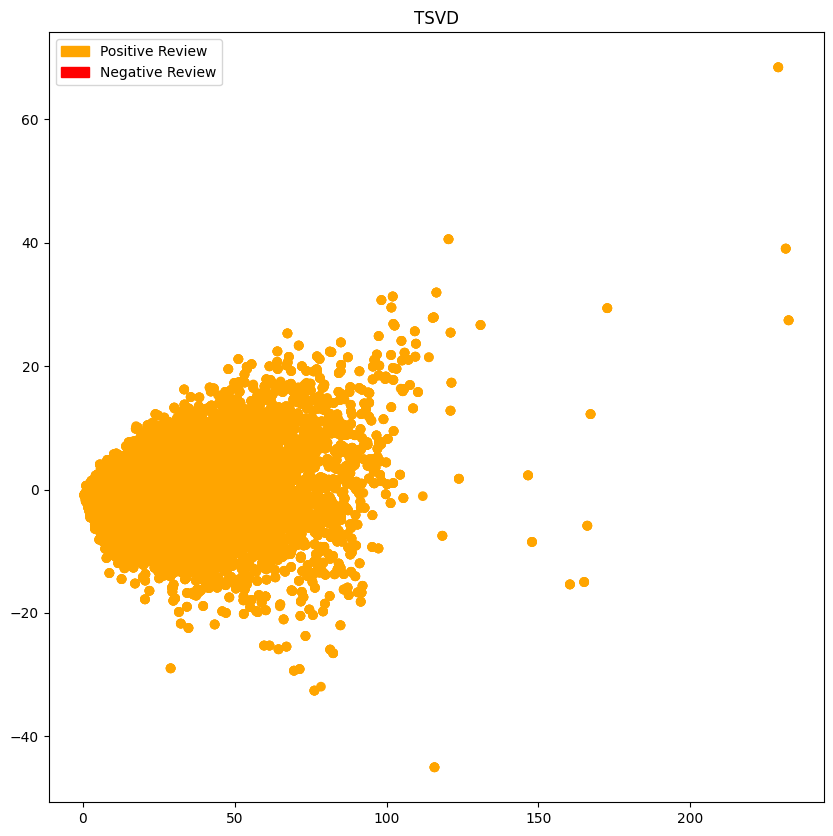

In [105]:
#Count Vectorization
import matplotlib
import matplotlib.pyplot as plt
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv

#Tfidf vectorization from sklearn
def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_cv,tfidfv

def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']

        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label        )

        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show()
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negtive Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show()

#Data prep
train_data=df
data_vect=train_data['review'].values
data_vect_good=count_good['review'].values
target_vect=train_data['Binary'].values
target_data_vect_good=df[df['sentiment']=='positive']['Binary'].values
data_vect_bad=count_bad['review'].values
target_data_vect_bad=df[df['sentiment']=='positive']['Binary'].values

#Convert dataframe into vectors
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)

print(train_data.head())
dimen_reduc_plot(train_data_cv,target_vect,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)
# dimen_reduc_plot(train_data_cv,target_vect,3)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,3)
# dimen_reduc_plot(train_data_cv,target_vect,2)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,2)

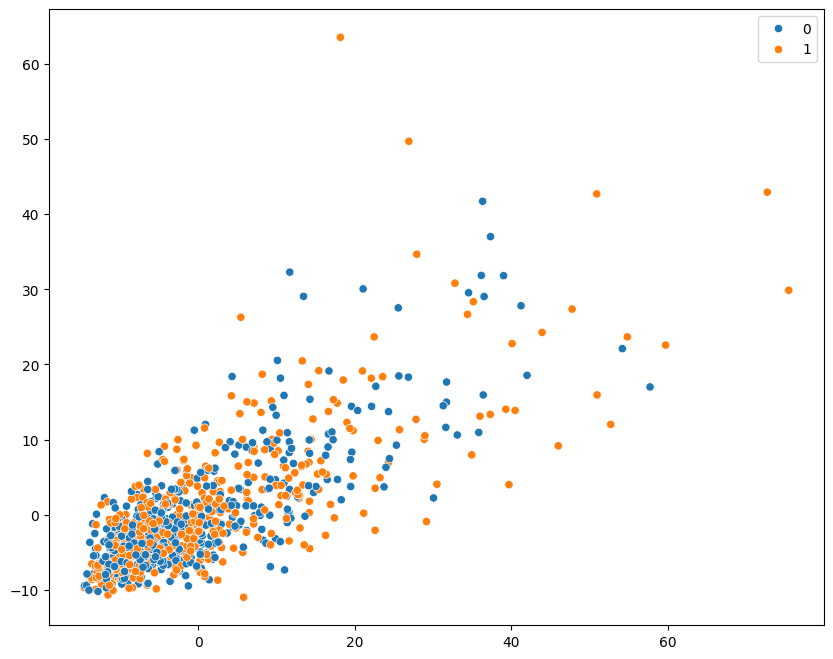

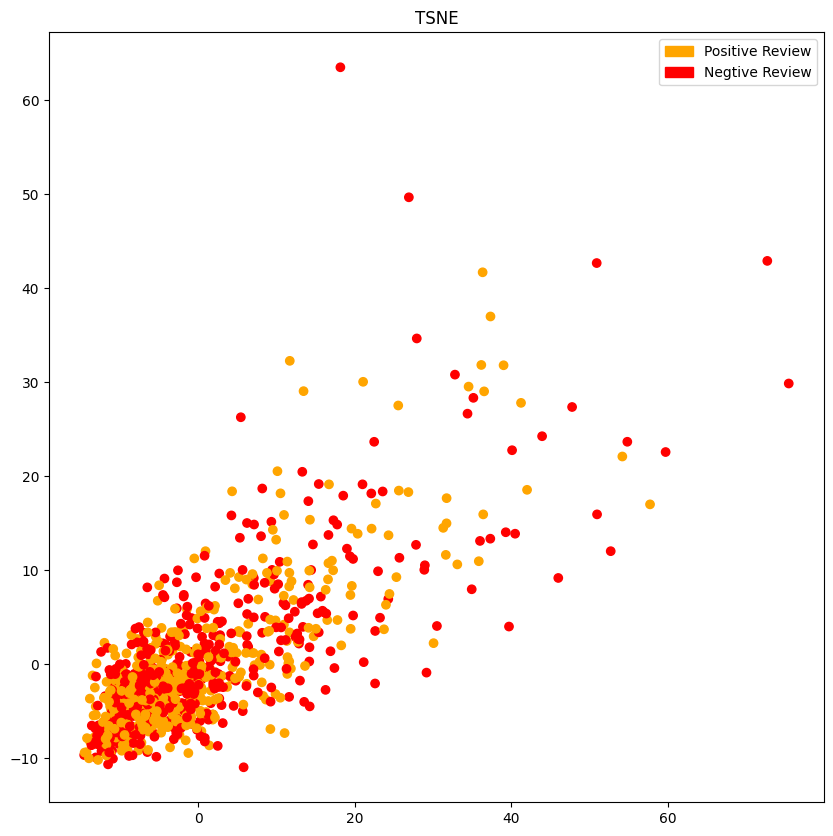

In [107]:
#TSNE visualization on first 1000 samples
train_data=df[:1000]
data_vect=train_data['review'].values
data_vect_good=count_good['review'].values
target_vect=train_data['Binary'].values
target_data_vect_good=df[df['sentiment']=='positive']['Binary'].values
data_vect_bad=count_bad['review'].values
target_data_vect_bad=df[df['sentiment']=='positive']['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)
dimen_reduc_plot(train_data_cv,target_vect,3)

#### Convert Input DataFrame to a List

This phase is helpful if we would like to investigate individual word embeddings or sentence embeddings. Differentiating the individual rows of text makes it easier to pass into static and dynamic embedding models.

In [2]:
check_df=list(df['review'].str.split())

NameError: name 'df' is not defined

#### Semantic Embeddings

In this context, we will be looking into semantic embeddings. These include embeddings which can either be static and dynamic. Word Embeddings fall under this category.

Word Embeddings: These are vector space transformations of the words present in the corpus. When converted to vectors, several metrics can be applied like finding similarity, distance measurement between the vectors, numerical transforms of the vectors. With word vectors, we can specify semantic similarity between different words or collection of words.

- Static embeddings (Word2Vec, GloVe) are good for basic NLP tasks but lack contextual understanding.

- Dynamic embeddings (BERT, GPT) are better for deep NLP models because they capture meaning based on context.

In [ ]:
%%time
## Load word2vec algorithm from gensim
from gensim.models import Word2Vec,KeyedVectors

model=Word2Vec(check_df,min_count=1)
word_li=list(model.wv.vocab)
print(word_li[:5])

In [ ]:
#View the Embedding Word Vector
plt.plot(model['reviewers'])
plt.show()

#### Dimension reduction of the embedding vectors

Let us try to visualize the compressed and decomposed embedding space based on first 50 entries in the dataset.Once we plot using the Word2Vec Skipgram/CBOW model, we can visualize the relative positioning of the words close to each other.

**Cosine Distance** measurement is one metric which determines closeness of the 2 word vectors.When we plot vectors using matplotlib, we will be seeing graphs like ECG(electro-cardiograms) diagrams. The reason being each word is analysed on the basis of the number of words in its surrounding words.

In [ ]:
#Measure Cosine distance
distance=model.similarity('reviewers','injustice')
print(distance)